# Import libraries (cleaning and visualization)

In [5]:
import pandas as pd
import numpy as np
import re #regesx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

#set the line style for the plots
sns.set_style("darkgrid")

**Ignore Warnings**

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploring And Cleaning

In [7]:
df = pd.read_csv('/content/file.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [9]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [10]:
# info of categorical data

df.describe(include='object')
#df.describe(exclude='number')

,Gender,Location,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status,Date,Coupon_Code
count,52924,52924,52924,52924,52924,52955,52924,52924,52555
unique,2,5,365,1145,404,21,3,365,48
top,F,Chicago,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,11/27/2019,SALE20
freq,33007,18380,335,3511,3511,18126,26926,335,6373


In [11]:
df.isna().sum()

,0
Unnamed: 0,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Transaction_Date,31
Product_SKU,31
Product_Description,31
Product_Category,0


In [12]:
# drop rows from index (52924 to 52954)
df.drop(index=range(52924,52954),axis=0,inplace=True)

In [13]:
# find ot unique values in each column
for column in df.columns:
  unique_values = df[column].unique()
  print(f"column: {column}")
  print(f"unique values: {unique_values}\n")

column: Unnamed: 0
unique values: [    0     1     2 ... 52922 52923 52954]

column: CustomerID
unique values: [17850. 13047. 12583. ... 16138. 13481.    nan]

column: Gender
unique values: ['M' 'F' nan]

column: Location
unique values: ['Chicago' 'California' 'New York' 'New Jersey' 'Washington DC' nan]

column: Tenure_Months
unique values: [12. 43. 33. 49. 46. 14. 25. 50. 39. 21. 30. 29. 26. 41. 24. 40. 28. 15.
 18. 32. 23.  7.  4.  8. 27. 13. 38. 22.  6. 34. 42. 45.  3. 16. 17. 20.
  9. 10. 19.  5. 37. 31. 44. 36. 48. 47.  2. 35. 11. nan]

column: Transaction_ID
unique values: [16679. 16680. 16696. ... 22504. 24250.    nan]

column: Transaction_Date
unique values: ['2019-01-01' '2019-01-03' '2019-01-04' '2019-01-16' '2019-01-17'
 '2019-01-18' '2019-01-21' '2019-01-22' '2019-01-24' '2019-01-26'
 '2019-01-02' '2019-01-30' '2019-01-25' '2019-01-05' '2019-01-06'
 '2019-01-07' '2019-01-08' '2019-01-20' '2019-01-09' '2019-01-10'
 '2019-01-11' '2019-01-28' '2019-01-12' '2019-01-13' '2019-0

In [14]:
# convert data type of (Transaction_Date, Date) into datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Date'] =pd.to_datetime(df['Date'])

In [15]:
date = pd.concat([df['Transaction_Date'], df['Date']], axis=1)
date

,Transaction_Date,Date
0,2019-01-01,2019-01-01
1,2019-01-01,2019-01-01
2,2019-01-01,2019-01-01
3,2019-01-01,2019-01-01
4,2019-01-01,2019-01-01
...,...,...
52920,2019-03-28,2019-03-28
52921,2019-10-06,2019-10-06
52922,2019-10-06,2019-10-06
52923,2019-10-06,2019-10-06


In [16]:
# check if every "single" value in (Transaction_Date) equals every single one in (Date)
x = 0
for i in range (len(df)):
  if df['Date'].iloc[i] == df['Transaction_Date'].iloc[i]:
 # if date.iloc[i,0] == date.iloc[i,1]:
    x += 1
print(x)

52924


In [17]:
# it sounds like the two columns are identical so we're gonna drop one of them
df.drop('Transaction_Date', axis=1, inplace=True)

In [18]:
# extrsct month from "Date"
df['Month'] = df['Date'].dt.month
df['Month'].head()


,Month
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [19]:
df['Month']=df['Month'].astype(float)

In [20]:
df.duplicated().sum()

0

In [21]:
# Define regular expressions
Product_brand = re.compile(r'(Nest|Google|Android|YouTube|Waze|Gift Card)')
# Extract product brands and store them in a new column
df['Product_brand'] = df['Product_Description'].apply(lambda x: Product_brand.search(str(x)).group(0) if Product_brand.search(str(x)) else 'UnKnown')

In [33]:
# Dropping some columns i won't need
df.drop(['Unnamed: 0','CustomerID','Transaction_ID','Product_SKU','Product_Description','Coupon_Code','Date'],axis=1,inplace=True)

In [23]:
df['Discount_pct'].fillna(0.0,inplace = True)

In [24]:
# Calculate Skeweness
Skeweness = df.select_dtypes(include=['int64', 'float64']).skew()
Skeweness

,0
Tenure_Months,-0.069555
Quantity,19.034802
Avg_Price,1.632580
Delivery_Charges,11.959739
GST,-0.351446
Offline_Spend,-0.316807
Online_Spend,0.454306
Month,-0.068609
Discount_pct,-0.043153


# Univariate Analysis

In [25]:
# Define function to show histogram and boxplot for each column
def plot_hist_and_boxplot(data,columns):
  # Create subplots based on the number of columns
  fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, 4*len(columns)))
  # Flatten the axes for easier indexing
  axes = axes.flatten()
  # Loop through each column and plot KDE and Boxplot
  for i, column in enumerate(columns):
    # KDE plot
    sns.histplot(data[column], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'{column} - KDE plot')

    # Boxplot
    sns.boxplot(data[column], ax=axes[2*i+1])
    axes[2*i+1].set_title(f'{column} - Boxplot')

  # Adjust layout
  plt.tight_layout()

  plt.show()

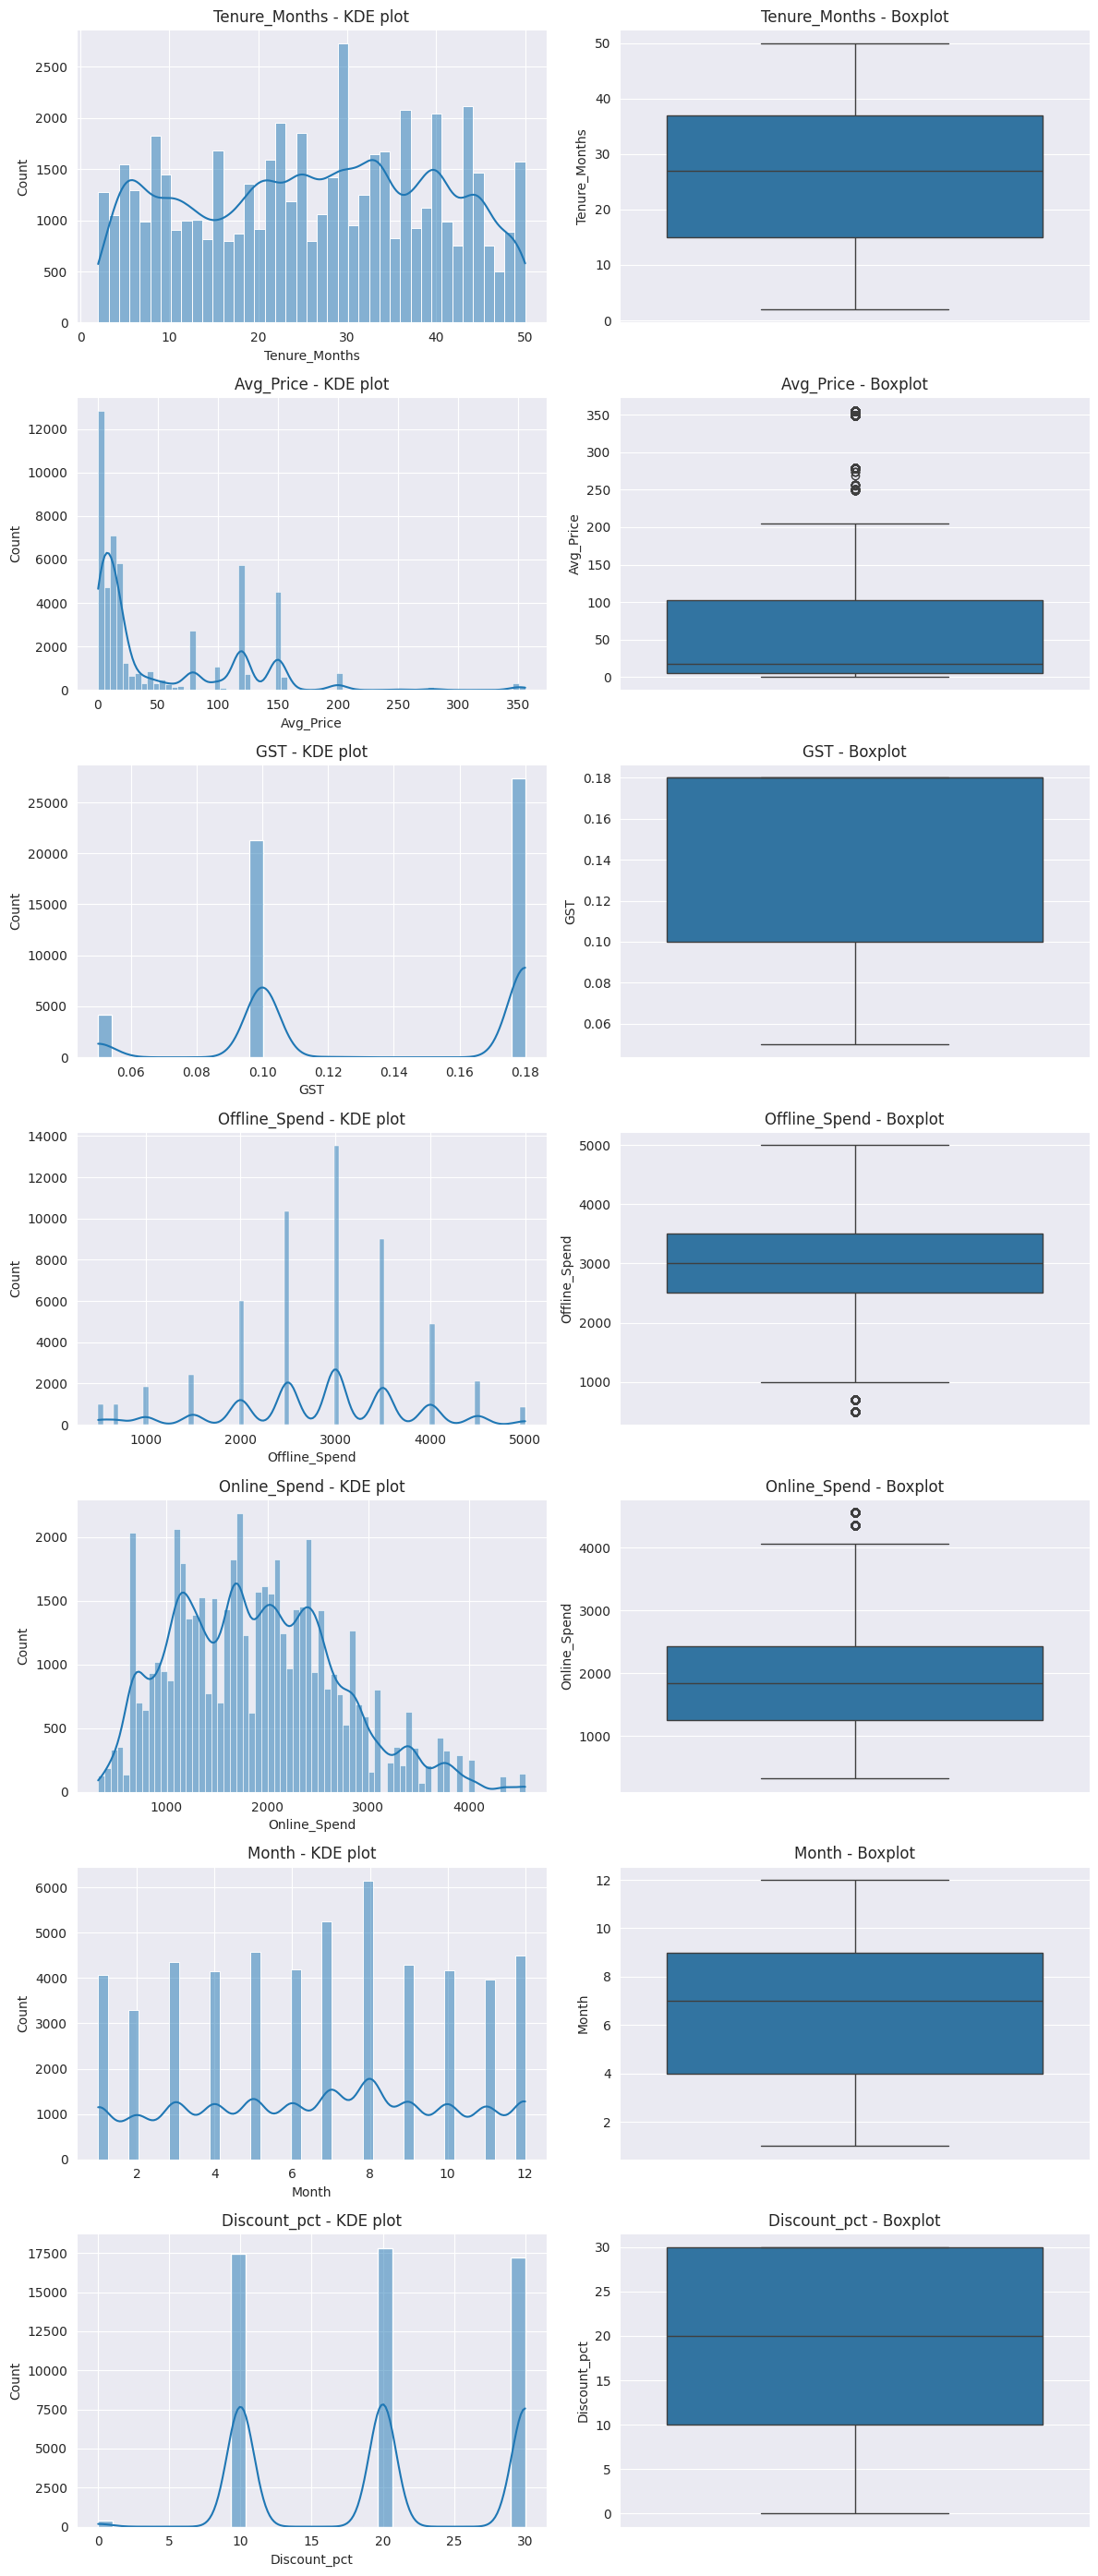

In [26]:
# Extract numerical columns as list
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Delivery_Charges')
numerical_columns.remove('Quantity')

# Call function
plot_hist_and_boxplot(df, numerical_columns)

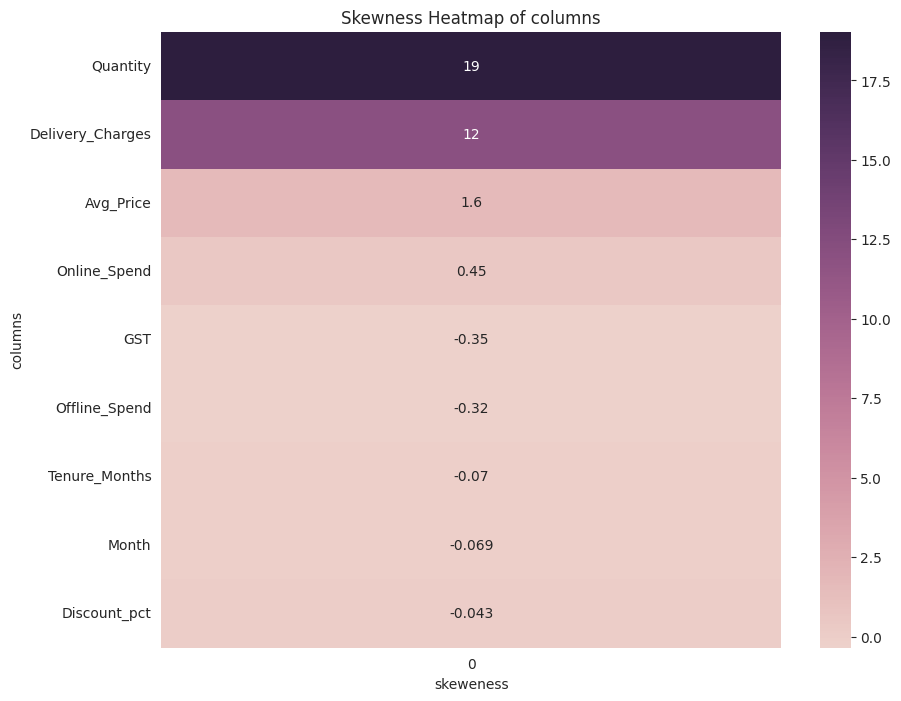

In [27]:
# Sort skewness values by their absolute values
skeweness_sorted = Skeweness.abs().sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Skeweness[skeweness_sorted.index].to_frame(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True)
plt.title('Skewness Heatmap of columns')
plt.xlabel('skeweness')
plt.ylabel('columns')
plt.show()

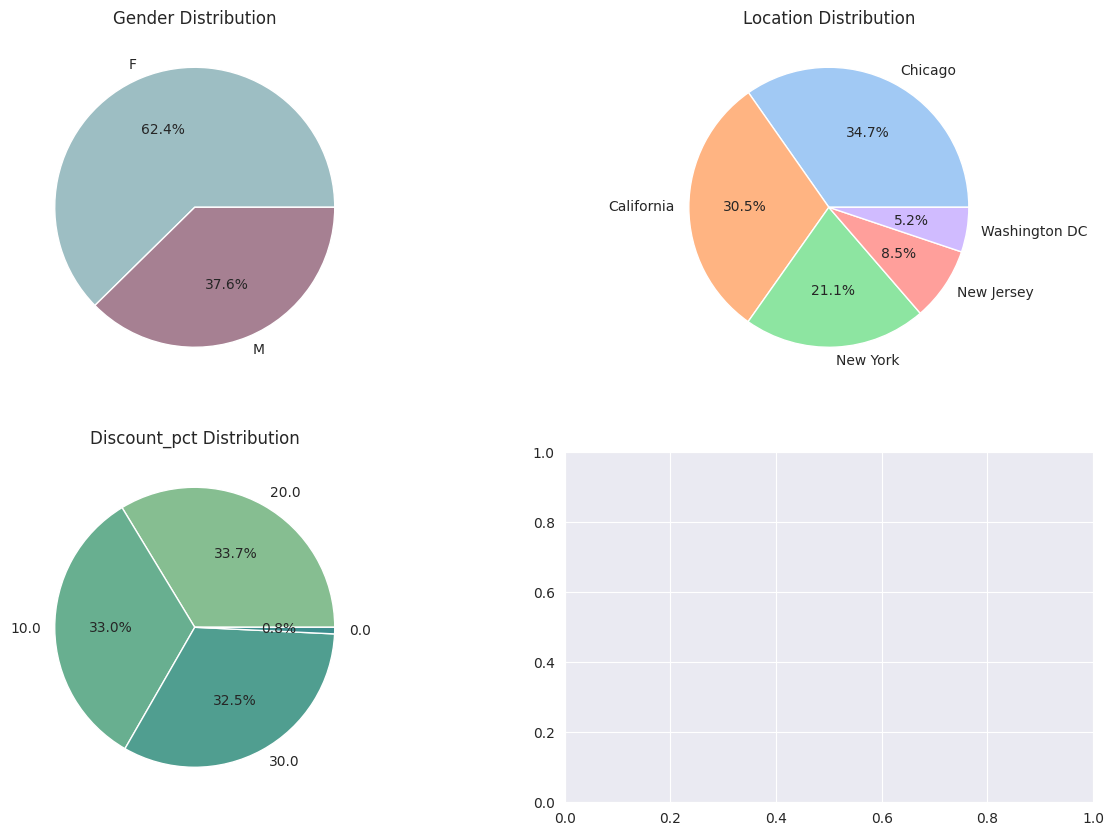

In [34]:
# Set up the figure and axes
fig, axes = plt.subplots(2,2, figsize=(15,10))

# Plot gender distribution
color_gender = ['#9dbec3','#a68092']
axes[0,0].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', colors=color_gender)
axes[0,0].set_title('Gender Distribution')

# Plot location distribution
color_location = sns.color_palette('pastel')
axes[0,1].pie(df['Location'].value_counts(), labels=df['Location'].value_counts().index, autopct='%1.1f%%', colors=color_location)
axes[0,1].set_title('Location Distribution')

# Plot Discount_pct distribution
color_discount = sns.color_palette("crest", 8)
axes[1,0].pie(df['Discount_pct'].value_counts(), labels=df['Discount_pct'].value_counts().index, autopct='%1.1f%%', colors=color_discount)
axes[1,0].set_title('Discount_pct Distribution')

# Show plot
plt.show()

**NOTE THAT**
 1. 62.4% of the sales where to the females
 2. Chicago is the most state with the sales demands while Wahington DC is the least
 3. 33.7% of the customers got 20% dicount while 0.8% got none

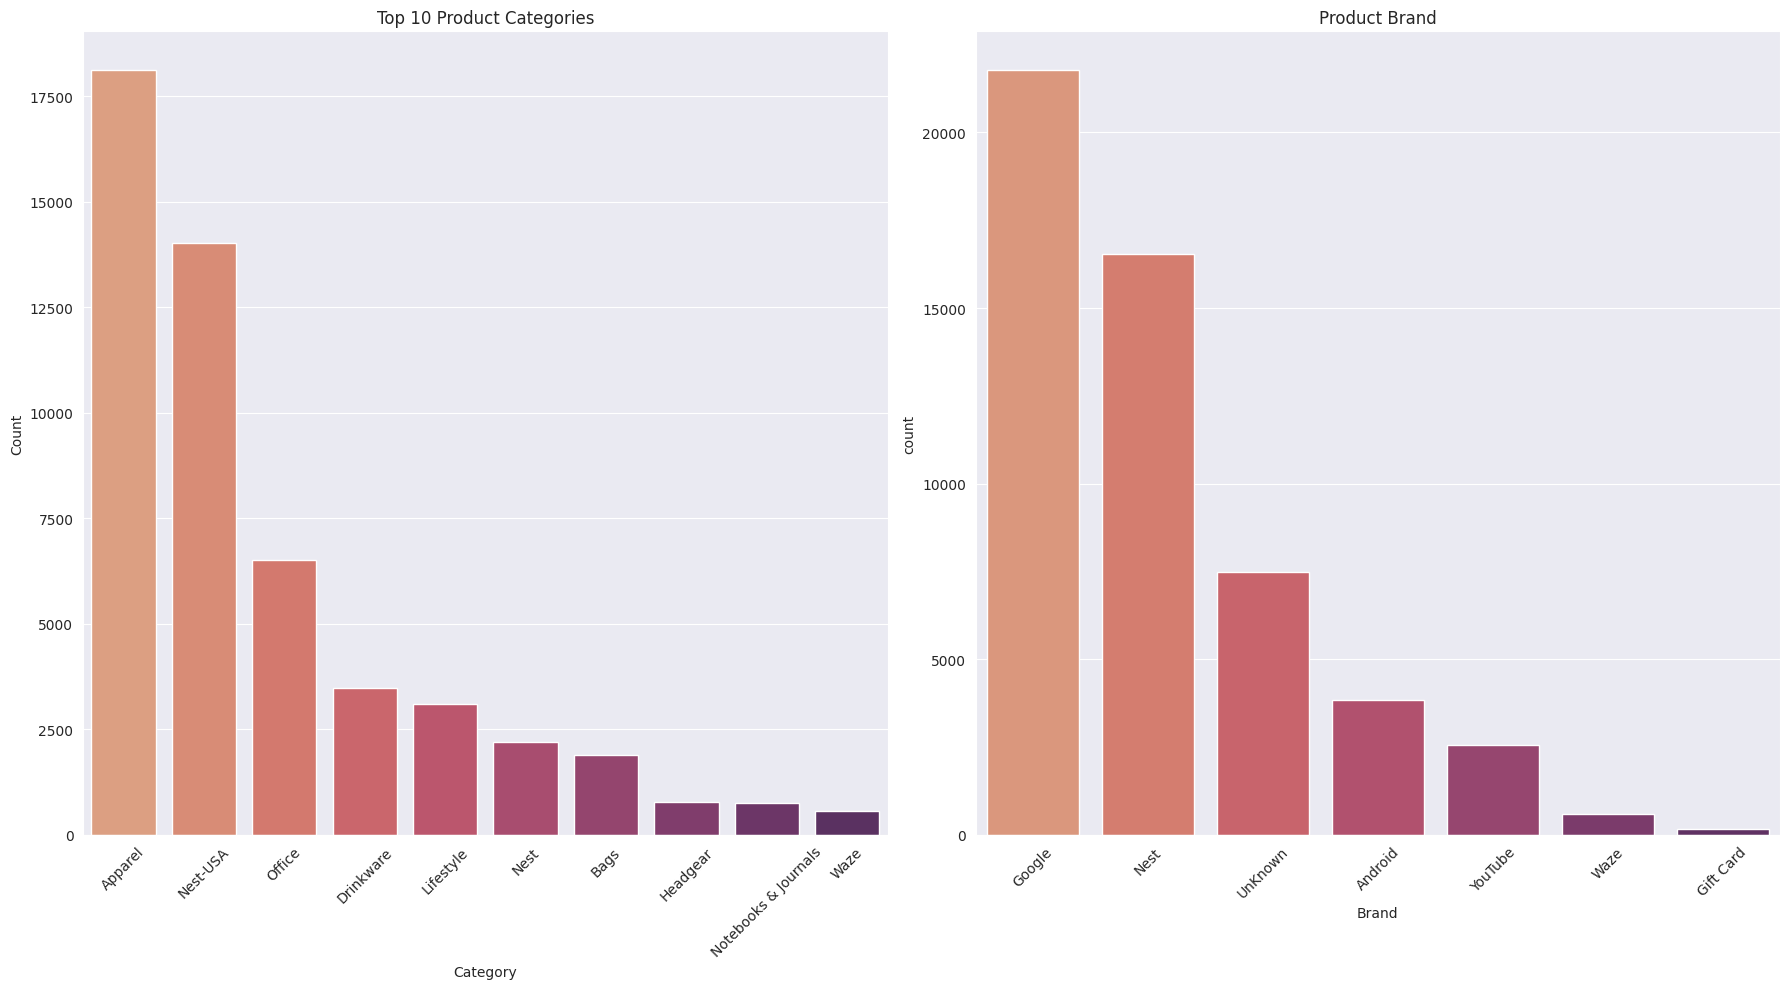

In [36]:
# Creat figure with two subplots
fig, axes = plt.subplots(1,2, figsize=(18,10))

# Plot the count of top 10 product categories
sns.countplot(x=df['Product_Category'], order=df['Product_Category'].value_counts().head(10).index, palette='flare', ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Product Categories')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the the count of product brand
sns.countplot(x=df['Product_brand'], order=df['Product_brand'].value_counts().index, palette='flare', ax=axes[1])
axes[1].set_xlabel('Brand')
axes[0].set_ylabel('Count')
axes[1].set_title('Product Brand')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


**NOTE THAT**
1. the most demand category is Apparel and Waze is the least
2. the best seller brand is Google

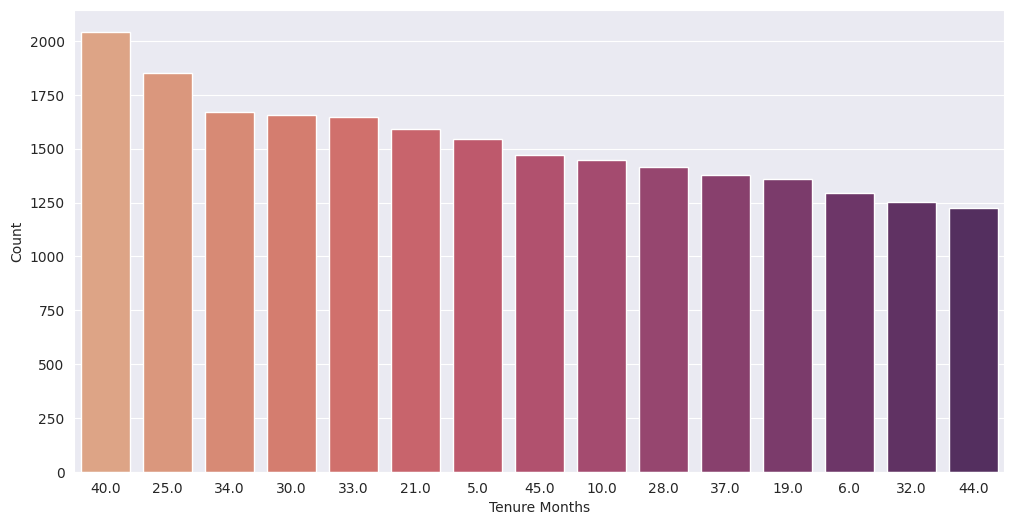

In [38]:
plt.figure(figsize=(12, 6))
# Plot the count plot
sns.countplot(x='Tenure_Months', data=df, order=df['Tenure_Months'].value_counts().head(15).index, palette='flare')
# Add labels for x-axis and y-axis
plt.xlabel('Tenure Months')
plt.ylabel('Count')
plt.yticks(np.arange(0, 2250, 250))
# Show the plot
plt.show()

**NOTE THAT**
 . Most customers joined the platform 40 months ago

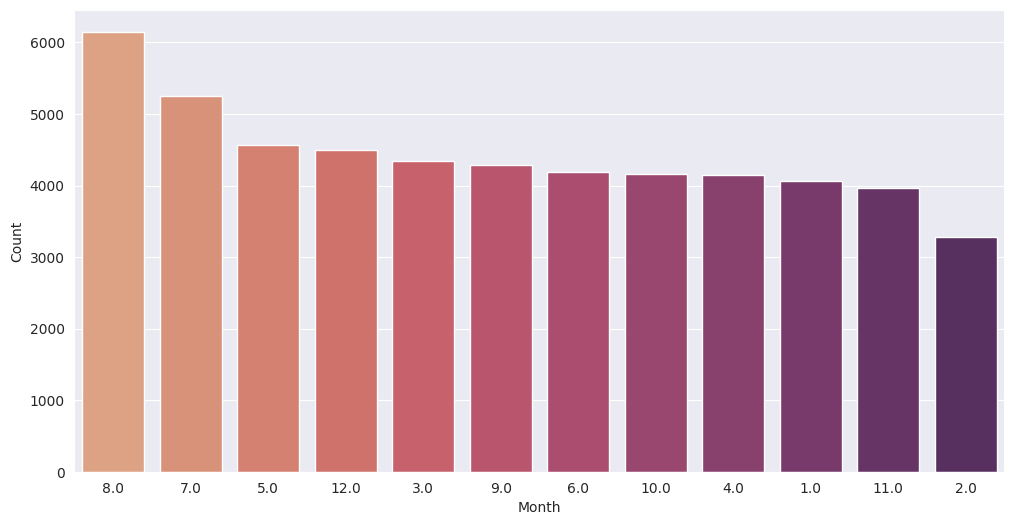

In [40]:
plt.figure(figsize=(12, 6))
# Plot the count plot
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='flare')
# Add labels for x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Count')
# Show the plot
plt.show()

**NOTE THAT**
1. Highest Month with sales is August
2. lowest Month is February

# Bivariate Analysis

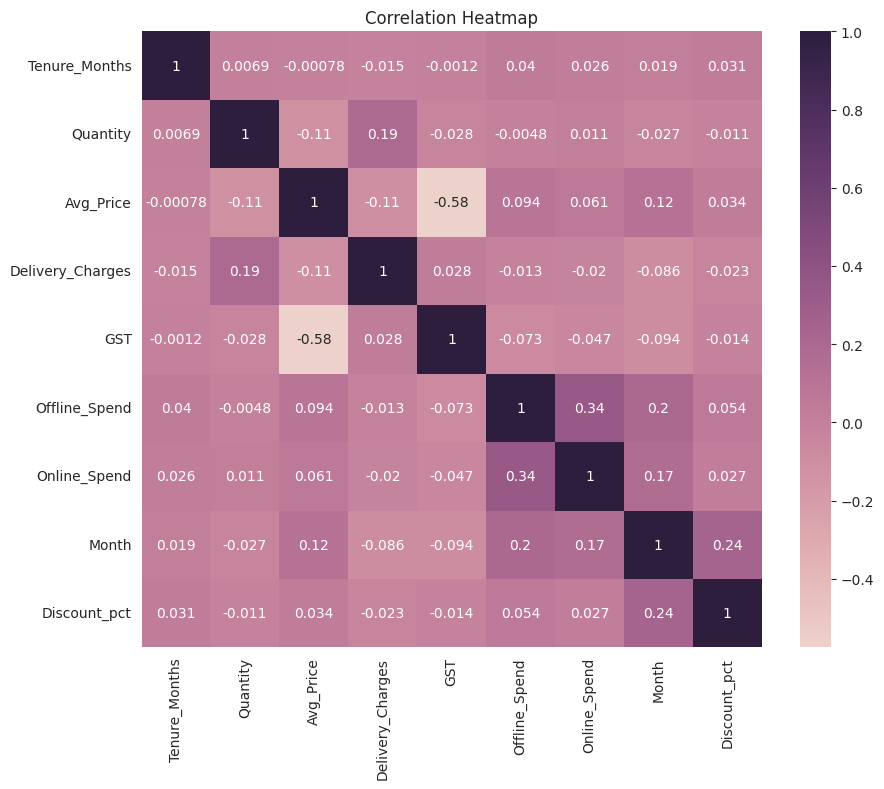

In [42]:
# Plot heatmap fo feature relation
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True)
plt.title('Correlation Heatmap')
plt.show()

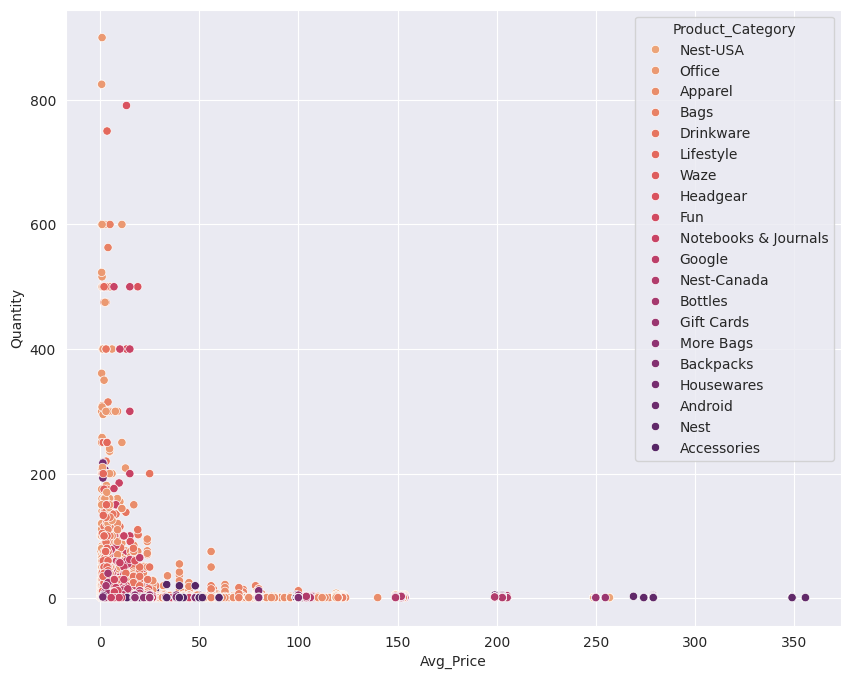

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Avg_Price', y='Quantity', data=df, hue='Product_Category', palette='flare')
plt.show()

**NOTE THAT**
 . An increase in the average price results in a decrease in the quantity sold

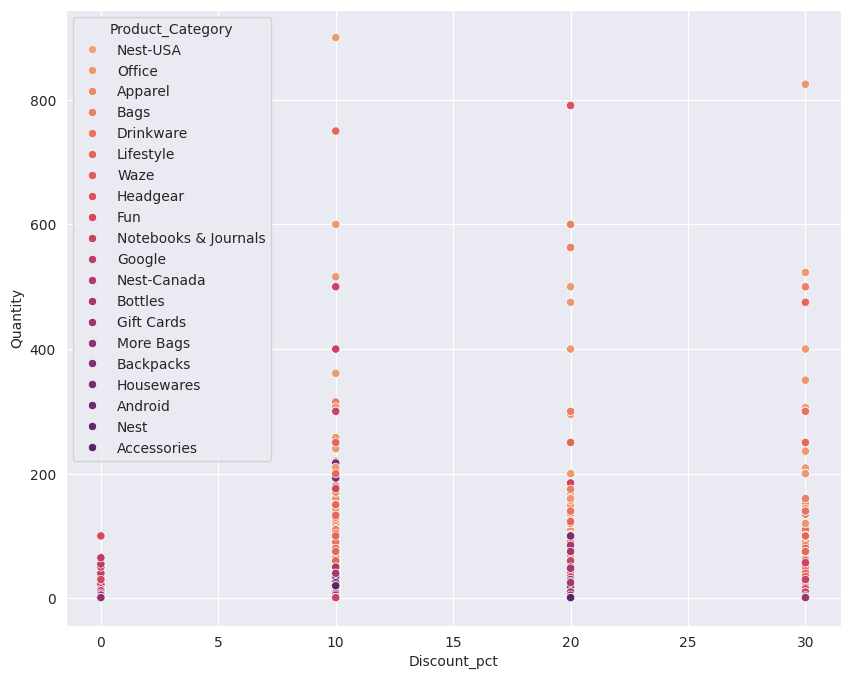

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Discount_pct', y='Quantity', data=df, hue='Product_Category', palette='flare')
plt.show()

**NOTE THAT**
 1. This plot shows that the salls increses when there is a discount (with each percentage)

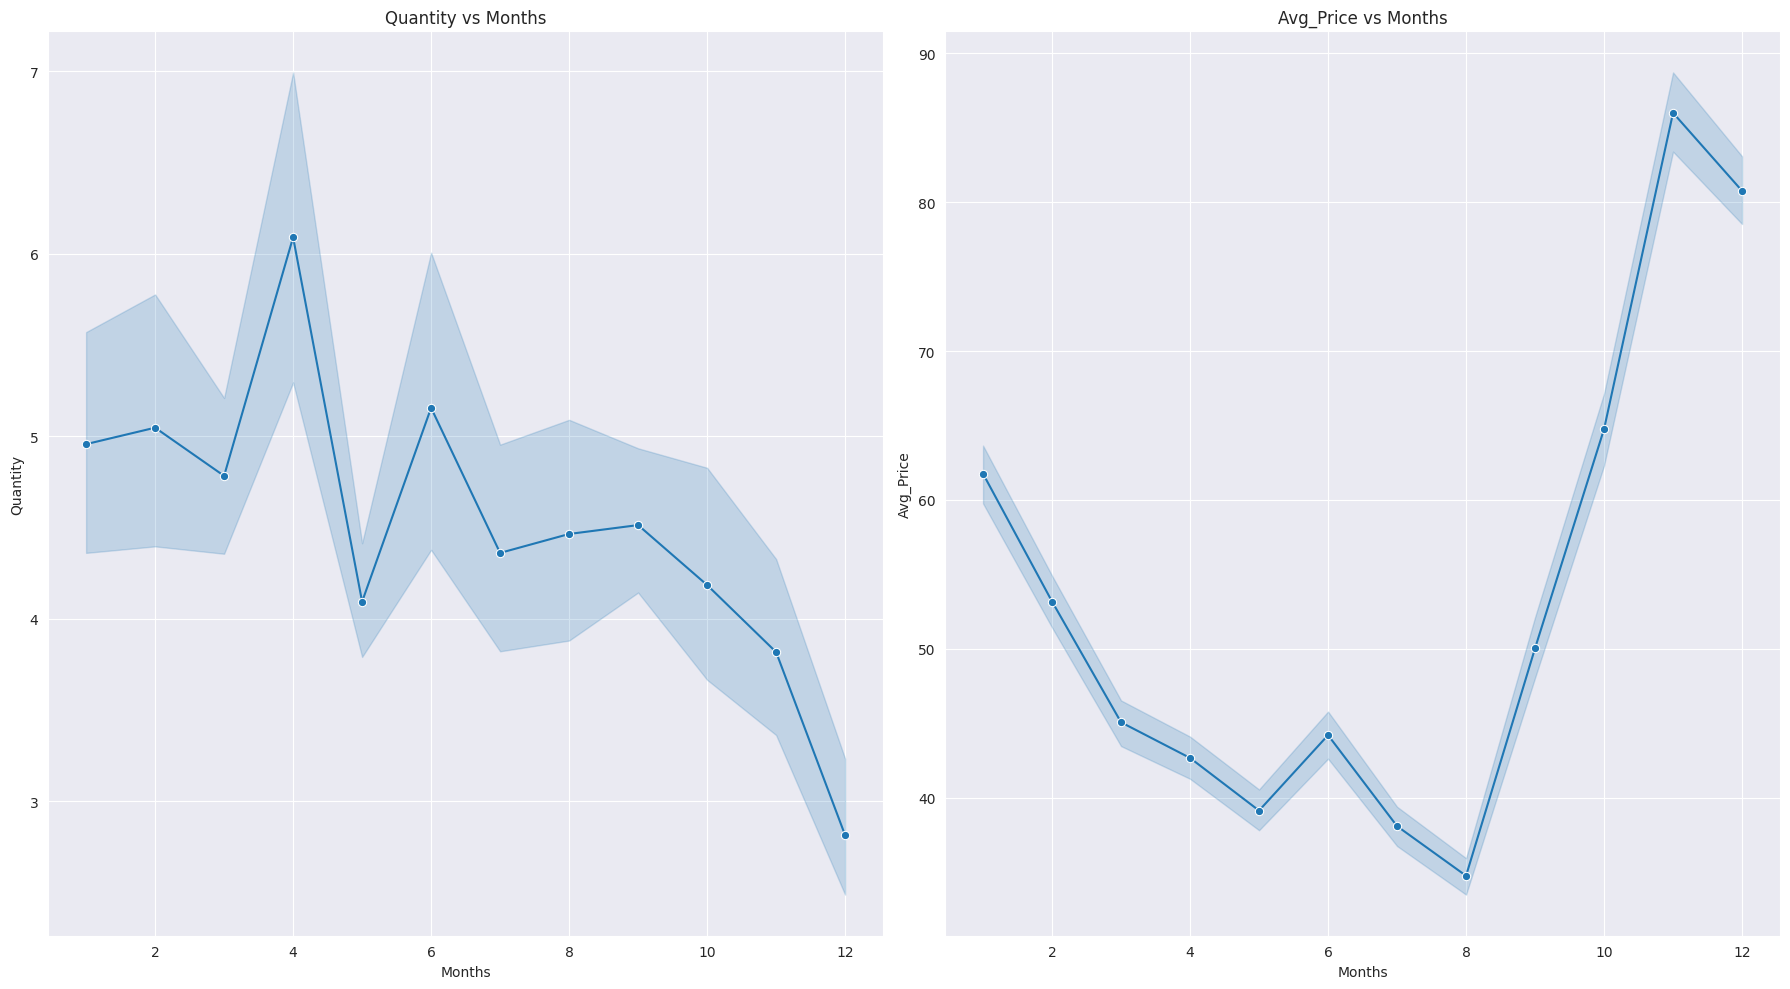

In [54]:
# Months vs (Quantity and Avg_Price)
fig, axes = plt.subplots(1,2, figsize=(18,10))

# Line plot on the top
sns.lineplot(x='Month', y='Quantity', data=df, ax=axes[0], marker='o')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Quantity')
axes[0].set_title('Quantity vs Months')

# Line plot on the top-right
sns.lineplot(x='Month', y='Avg_Price', data=df, ax=axes[1], marker='o')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Avg_Price')
axes[1].set_title('Avg_Price vs Months')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

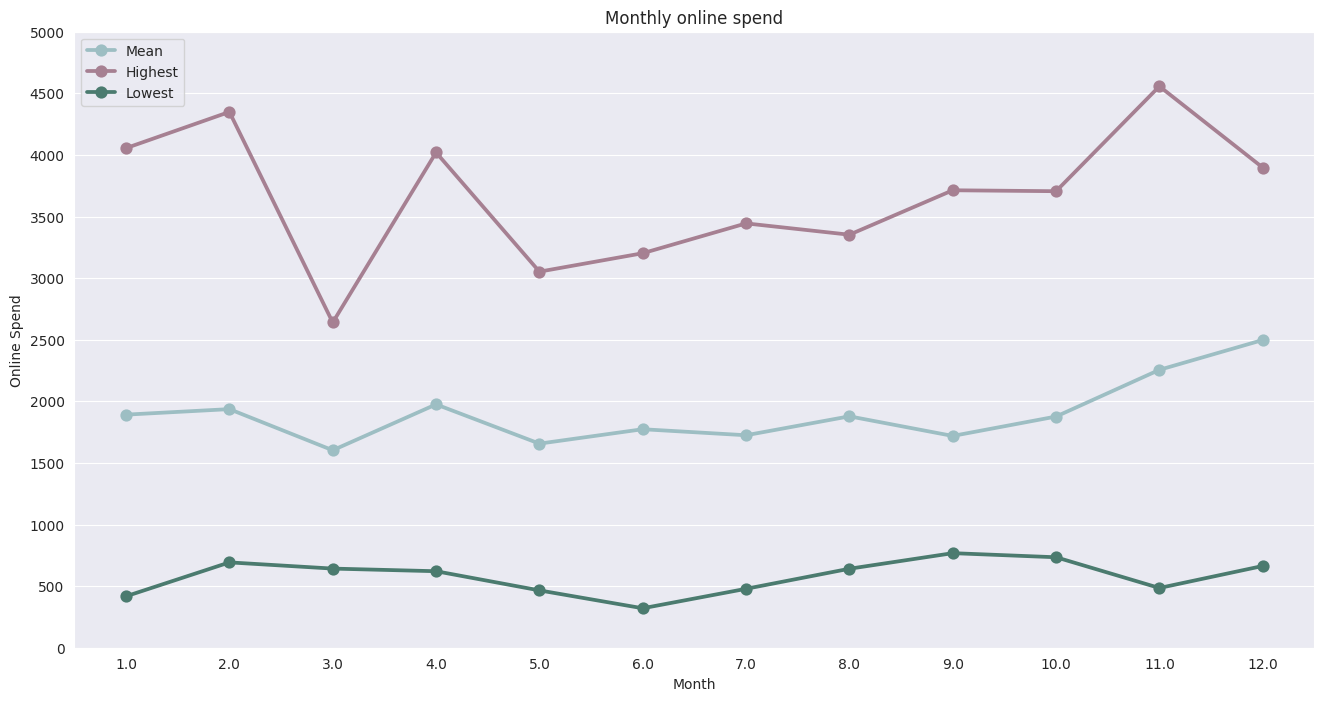

In [57]:
# Group by month and calculate the mean, highest, and lowest online spend
monthly_purchase_stats = df.groupby('Month')['Online_Spend'].agg(['mean', 'max', 'min']).reset_index()

# Plotting
plt.figure(figsize=(16, 8))

# Plot mean online spend
color_gender = ['#9dbec3','#a68092']
color_gender = ['#9dbec3','#a68092']
mean_plot = sns.pointplot(data=monthly_purchase_stats, x='Month', y='mean', color='#9dbec3')

# Plot highest online spend
max_plot = sns.pointplot(data=monthly_purchase_stats, x='Month', y='max', color='#a68092')

# Plot lowest online spend
min_plot = sns.pointplot(data=monthly_purchase_stats, x='Month', y='min', color='#4b7b6f')

# Set legend labels and colors
plt.legend(handles=[
    mean_plot.lines[0],
    max_plot.lines[0],
    min_plot.lines[0]
],
labels=['Mean', 'Highest', 'Lowest'],
loc='upper left')
# Set the colors of legend lines
legend_line_colors = ['#9dbec3', '#a68092', '#4b7b6f']
for handle, color in zip(plt.gca().get_legend().legendHandles, legend_line_colors):
    handle.set_color(color)

plt.title('Monthly online spend')
plt.xlabel('Month')
plt.ylabel('Online Spend')
plt.yticks(np.arange(0, df['Online_Spend'].max() + 500, 500))
plt.show()


**NOTE THAT**
1. The highest online spend happened in November.
2. The Month with the most money spend was December.
3. The lowest online spend happened in June.